# Import Libraries

In [113]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

In [116]:
df=pd.read_csv(r"C:\Users\abhij\Desktop\superstore_sales\superstore.csv")
df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [117]:
df.tail()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
51285,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,1,2014-12-03 00:00:00.000,CA-2014-109701,...,69,Corporate,2014-12-04 00:00:00.000,Same Day,5.15,California,Binders,2014,North America,49
51286,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,1,2014-12-03 00:00:00.000,CA-2014-109701,...,9,Corporate,2014-12-04 00:00:00.000,Same Day,0.44,California,Binders,2014,North America,49
51287,Office Supplies,Los Angeles,United States,HR-147704,Hallie Redmond,0.2,US,1,2014-12-18 00:00:00.000,CA-2014-106964,...,12,Home Office,2014-12-21 00:00:00.000,First Class,0.31,California,Binders,2014,North America,51
51288,Office Supplies,Los Angeles,United States,RM-196754,Robert Marley,0.2,US,1,2014-12-25 00:00:00.000,CA-2014-145219,...,90,Home Office,2014-12-26 00:00:00.000,First Class,15.95,California,Binders,2014,North America,52
51289,Office Supplies,Los Angeles,United States,FH-143654,Fred Hopkins,0.2,US,1,2014-12-26 00:00:00.000,CA-2014-121398,...,154,Corporate,2014-12-30 00:00:00.000,Standard Class,9.59,California,Binders,2014,North America,52


# Data Cleaning

In [121]:
#Check for missing values
print(df.isnull().sum())

#Drop rows with missing values
df=df.dropna()

#Check for duplicates
print('Duplicates: ', 
      df.duplicated().sum())
df=df.drop_duplicates()

#Convert 'Order Date' and 'Ship Date' to datetime
df['Order.Date'] = pd.to_datetime(df['Order.Date'])
df['Ship.Date'] = pd.to_datetime(df['Ship.Date'])

#Drop unnecessary columns
columns_to_drop=['Row.ID', '记录数']
df.drop(columns=columns_to_drop,axis=1)

#Summary of cleaned data
print(df.info())

Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
记录数               0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64
Duplicates:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Category        51290 non-null  object        
 1   City            51290 non-null  object        
 2   Country         51290 non-null  object        
 3   Customer.ID     51290 non-null  object        
 4   Custom

In [122]:
print(df.columns)

Index(['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name',
       'Discount', 'Market', '记录数', 'Order.Date', 'Order.ID', 'Order.Priority',
       'Product.ID', 'Product.Name', 'Profit', 'Quantity', 'Region', 'Row.ID',
       'Sales', 'Segment', 'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'State',
       'Sub.Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')


# Exploratory Data analysis(EDA)

In [126]:
#Basic statistics
print(df.describe())

           Discount      记录数                     Order.Date        Profit  \
count  51290.000000  51290.0                          51290  51290.000000   
mean       0.142908      1.0  2013-05-11 21:26:49.155780864     28.610982   
min        0.000000      1.0            2011-01-01 00:00:00  -6599.978000   
25%        0.000000      1.0            2012-06-19 00:00:00      0.000000   
50%        0.000000      1.0            2013-07-08 00:00:00      9.240000   
75%        0.200000      1.0            2014-05-22 00:00:00     36.810000   
max        0.850000      1.0            2014-12-31 00:00:00   8399.976000   
std        0.212280      0.0                            NaN    174.340972   

           Quantity       Row.ID         Sales                      Ship.Date  \
count  51290.000000  51290.00000  51290.000000                          51290   
mean       3.476545  25645.50000    246.498440  2013-05-15 20:42:42.745174784   
min        1.000000      1.00000      0.000000            2011-

            Region    Sales        Profit  Quantity
0           Africa   783776   88871.63100     10564
1           Canada    66932   17817.39000       833
2        Caribbean   324281   34571.32104      6299
3          Central  2822399  311403.98164     41762
4     Central Asia   752839  132480.18700      7715
5             EMEA   806184   43897.97100     11517
6             East   678834   91522.78000     10618
7            North  1248192  194597.95252     18021
8       North Asia   848349  165578.42100      8851
9          Oceania  1100207  120089.11200     12838
10           South  1600960  140355.76618     25206
11  Southeast Asia   884438   17852.32900     11822
12            West   725514  108418.44890     12266
          Category    Sales        Profit
0        Furniture  4110884  285204.72380
1  Office Supplies  3787330  518473.83430
2       Technology  4744691  663778.73318


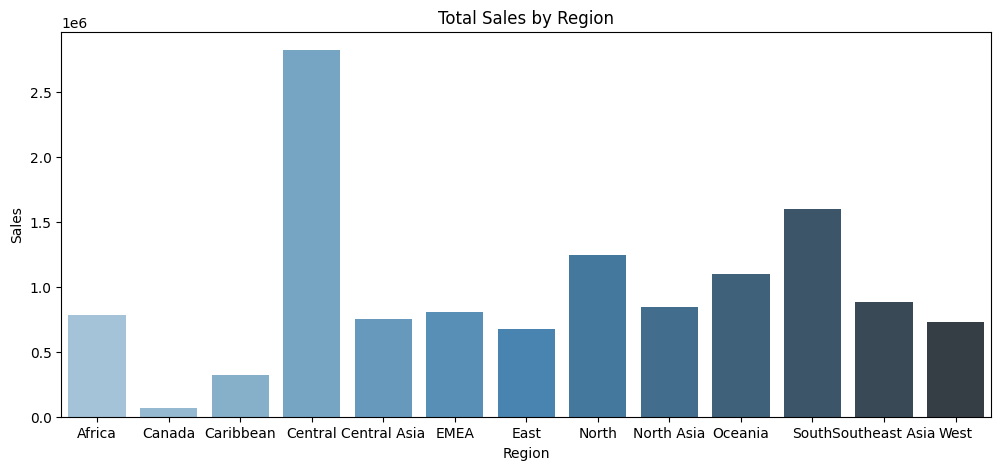

In [128]:
#Total sales, profit and quantity by region
region_summary=df.groupby('Region').agg({'Sales': 
                                        'sum', 'Profit': 'sum', 'Quantity': 'sum'}).reset_index()
print(region_summary)

#Sales and profit by category
category_summary=df.groupby('Category').agg({'Sales': 
                                             'sum', 'Profit': 'sum'}).reset_index()
print(category_summary)

#Visualize sales vs profit by region
plt.figure(figsize=(12, 5))
sns.barplot(data=region_summary, x='Region', y='Sales', hue='Region', palette='Blues_d')
plt.title('Total Sales by Region')
plt.show()

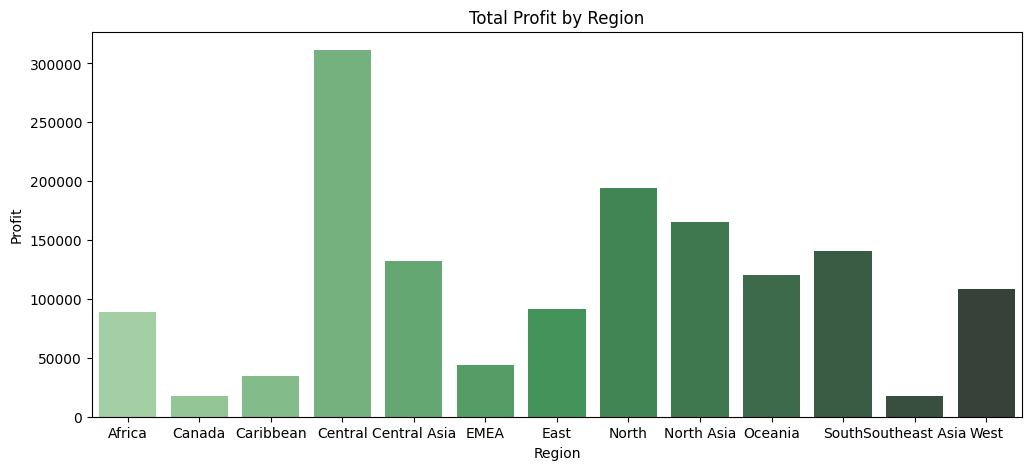

In [129]:
plt.figure(figsize=(12, 5))
sns.barplot(data=region_summary, x='Region', y='Profit',hue='Region', palette='Greens_d')
plt.title('Total Profit by Region')
plt.show()

# ETL Process

In [132]:
import sqlite3

#connect to SQLite
conn=sqlite3.connect('superstore.db')
df.to_sql('orders', conn, 
          if_exists='replace', index=False)

#Perform SQL query: Total Sales by Region
query= """
SELECT Region, SUM(Sales) AS
Total_Sales, SUM(Profit) AS
Total_PRofit
FROM orders
GROUP BY Region
ORDER BY Total_Sales DESC;
"""

region_sales=pd.read_sql(query, conn)
print(region_sales)

#Save cleaned data to a csv
df.to_csv('Cleaned_global_superstore.csv', index=False)

            Region  Total_Sales  Total_PRofit
0          Central      2822399  311403.98164
1            South      1600960  140355.76618
2            North      1248192  194597.95252
3          Oceania      1100207  120089.11200
4   Southeast Asia       884438   17852.32900
5       North Asia       848349  165578.42100
6             EMEA       806184   43897.97100
7           Africa       783776   88871.63100
8     Central Asia       752839  132480.18700
9             West       725514  108418.44890
10            East       678834   91522.78000
11       Caribbean       324281   34571.32104
12          Canada        66932   17817.39000


# Advanced Data Visulaization in Python

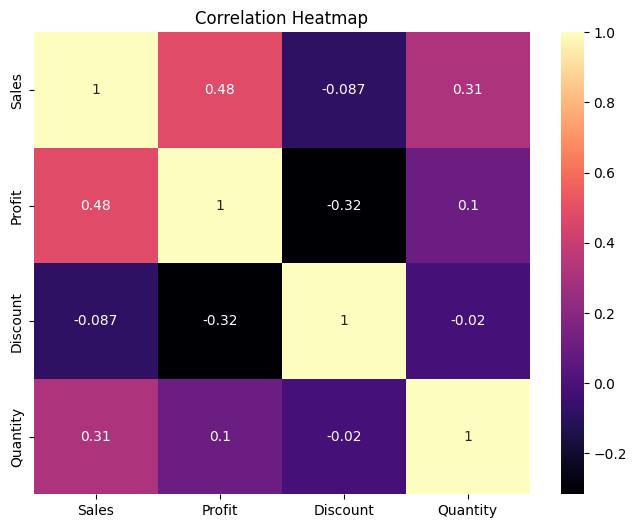

In [135]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
correlation = df[['Sales', 'Profit', 'Discount', 'Quantity']].corr()
sns.heatmap(correlation, annot=True, cmap='magma')
plt.title('Correlation Heatmap')
plt.show()

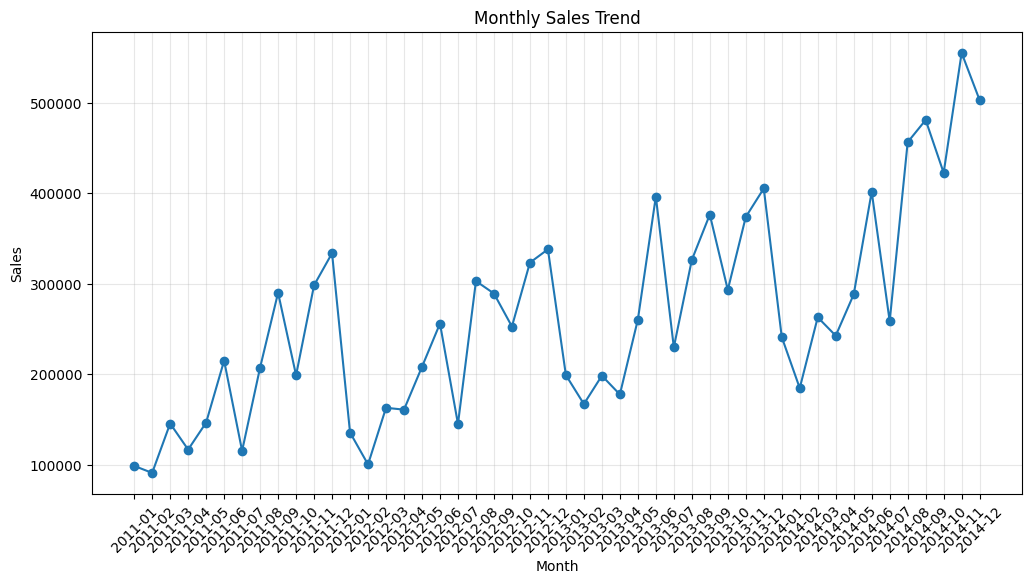

In [136]:
# Monthly sales trend
df['Month'] = df['Order.Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()

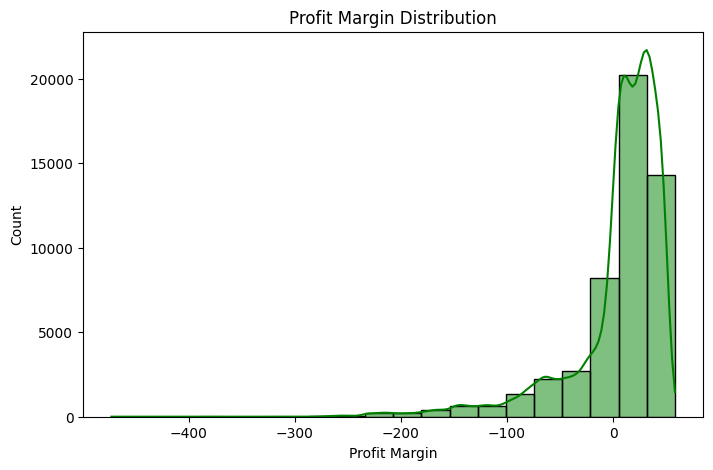

In [137]:
# Profit margin distribution
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100
plt.figure(figsize=(8, 5))
sns.histplot(df['Profit Margin'], bins=20, kde=True, color='green')
plt.title('Profit Margin Distribution')
plt.show()

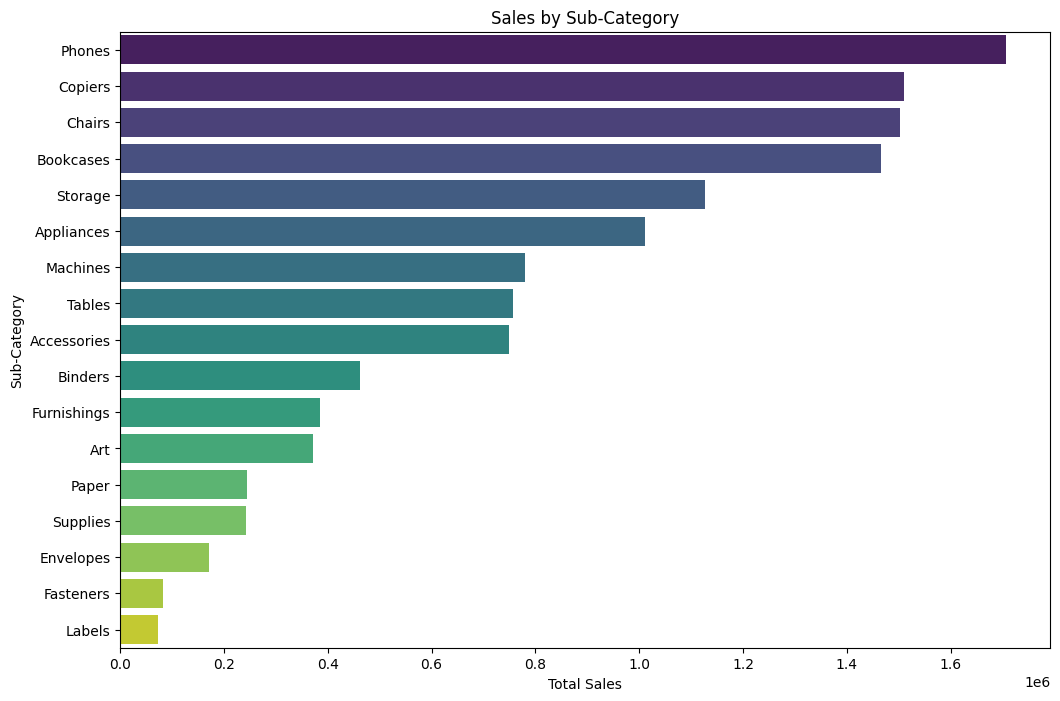

In [138]:
# Sales and Profit by Sub-Category
sub_category_summary = df.groupby('Sub.Category').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index().sort_values(by='Sales', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=sub_category_summary, y='Sub.Category', x='Sales',hue='Sub.Category', palette='viridis')
plt.title('Sales by Sub-Category')
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')
plt.show()

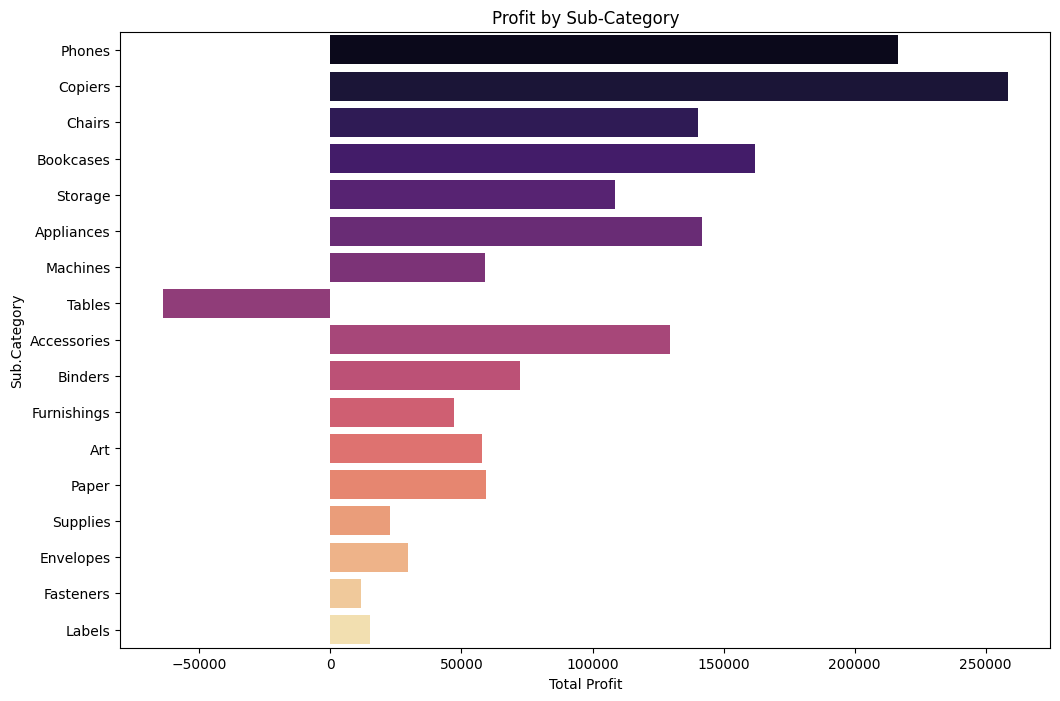

In [139]:
plt.figure(figsize=(12, 8))
sns.barplot(data=sub_category_summary, y='Sub.Category', x='Profit',hue='Sub.Category', palette='magma')
plt.title('Profit by Sub-Category')
plt.xlabel('Total Profit')
plt.ylabel('Sub.Category')
plt.show()

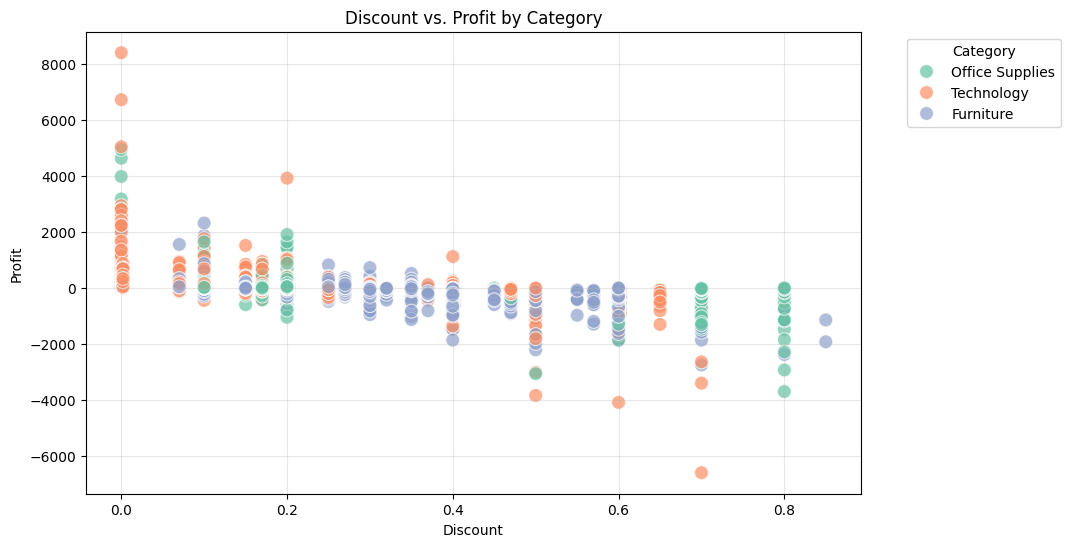

In [140]:
# Discount vs. Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category', palette='Set2', s=100, alpha=0.7)
plt.title('Discount vs. Profit by Category')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid(alpha=0.3)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

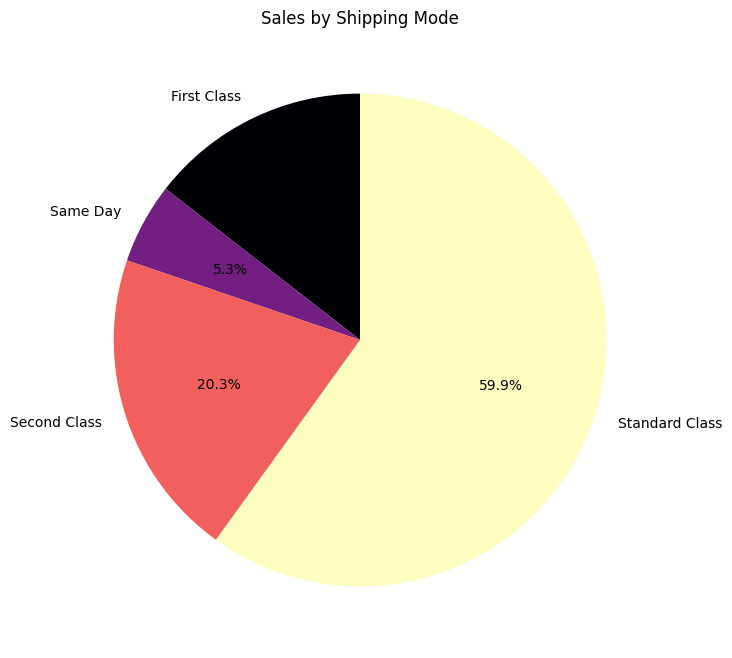

In [141]:
# Sales by Shipping Mode
shipping_sales = df.groupby('Ship.Mode')['Sales'].sum()

plt.figure(figsize=(8, 8))
shipping_sales.plot.pie(autopct='%1.1f%%', startangle=90, cmap='magma')
plt.title('Sales by Shipping Mode')
plt.ylabel('')
plt.show()

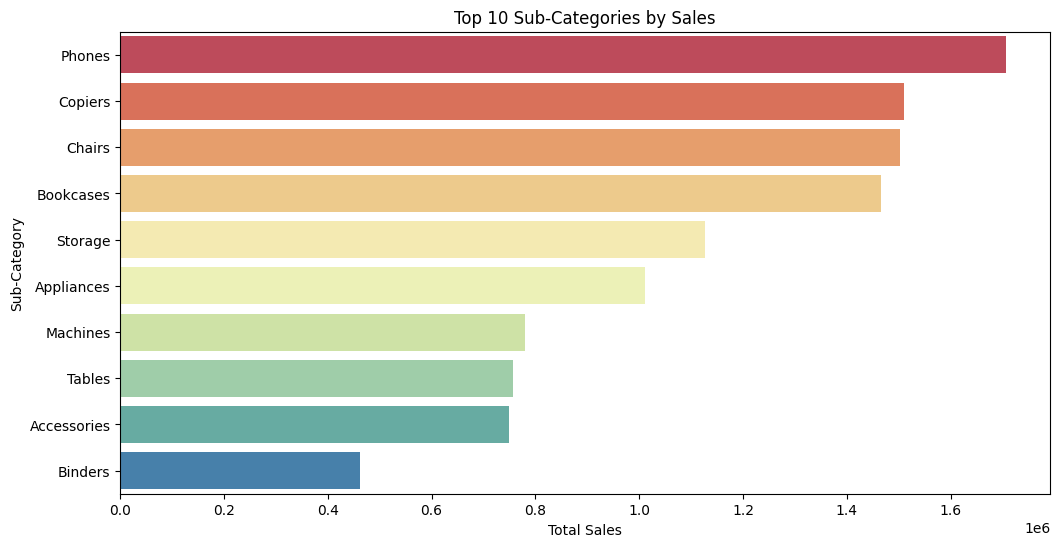

In [142]:
# Top 10 Sub-Categories by Sales
top_10_subcategories = sub_category_summary.nlargest(10, 'Sales')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_subcategories, y='Sub.Category', x='Sales',hue='Sub.Category', palette='Spectral')
plt.title('Top 10 Sub-Categories by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')
plt.show()

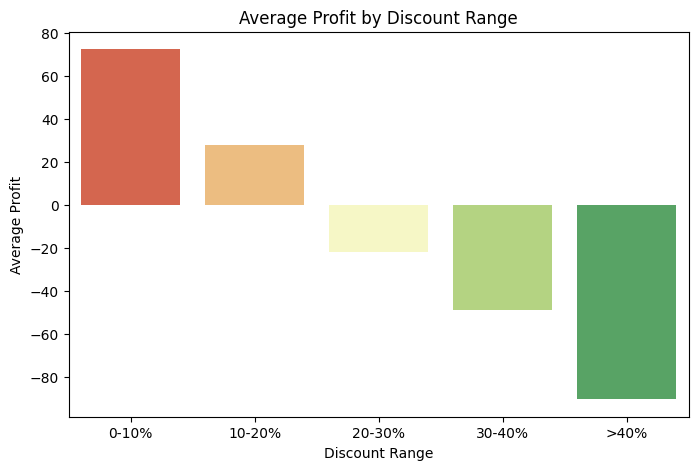

In [143]:
# Create discount bins
df['Discount Range'] = pd.cut(df['Discount'], bins=[0, 0.1, 0.2, 0.3, 0.4, 1], labels=['0-10%', '10-20%', '20-30%', '30-40%', '>40%'])

# Average Profit by Discount Range
discount_profit_summary = df.groupby('Discount Range', observed=False)['Profit'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(data=discount_profit_summary, x='Discount Range', y='Profit', hue='Discount Range',palette='RdYlGn', legend=False)
plt.title('Average Profit by Discount Range')
plt.xlabel('Discount Range')
plt.ylabel('Average Profit')
plt.show()

In [145]:
df.to_excel('cleaned_data.xlsx', index=False)